In [31]:
from os import path
import numpy as np
import tsahelper.tsahelper as tsa

from src.config import *
from src.zones import common_threat_body_map
from src.crop import crop_dims, hard_crop
from src.utils import plot_image, animate_scan, get_labels, get_random_subject_id

In [33]:
labels = get_labels()
threats = labels[labels.Probability == 1]
threats12 = threats[threats.zone_num == 12]

## Resources:
* https://github.com/dhammack/DSB2017
* https://github.com/dhammack/DSB2017

In [289]:
subject_id = get_random_subject_id(threats12)
image = np.load(path.join(path_cache, subject_id + '.npy'))
cropped = hard_crop(image, common_threat_body_map[12])

animate_scan(cropped[:, :, 20:100:2])

In [199]:
import cv2
from scipy.ndimage import convolve

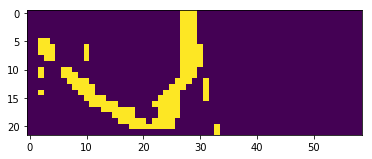

In [296]:
i = 65
convolved = convolve(cropped, np.ones((2, 2, 2)))
img_slice = convolved[:, :, i]
img = img_slice.copy()

img = 255 * (img > .8)
img = np.uint8(img)

plot_image(img)

In [274]:
image, contours, hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

5

In [275]:
def fill_countour(contour, img_shape):
    """Get filled contour."""
    c_mask = np.zeros(img_shape, np.uint8)
    cv2.fillPoly(c_mask, [contour], 255)
    return c_mask

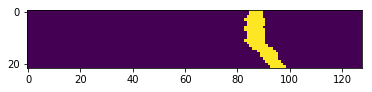

37995

In [276]:
c_filled = fill_countour(contours[2], img.shape)
plot_image(c_filled)
c_filled.sum()

In [277]:
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
else:
    mask = (np.zeros(img.shape, np.uint8) < 255)
    masks.append(mask)
#     continue
mask = np.zeros_like(img, np.uint8)
cv2.fillPoly(mask, [largest_contour], 255)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

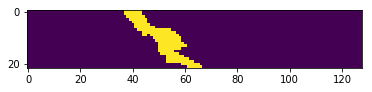

In [278]:
plot_image(mask)

In [279]:
img[img < 255].max()

0

In [280]:
img = ~img 
img[(mask == 0)] = 2

In [281]:
img[img < 255].max()

2

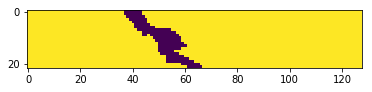

In [282]:
plot_image(img)

In [283]:
img[img < 255].max()

2

In [284]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)  # <- to remove speckles...
img = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel)
img = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)
img = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

In [285]:
img.max()

2

In [286]:
mask = img < 255
# masks.append(mask)

In [287]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

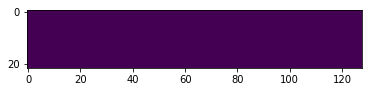

In [288]:
plot_image(mask)